<a href="https://colab.research.google.com/github/Somu112/Predictive-Analysis/blob/master/Linear_Regression_with_stats_some_important_Dataset_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression is a technique that predicts the value of variable y based on the values of x

* Linear regression is a supervised algorithm
* Used for finding relationship between independent and dependent variable
* Finds relation between two or more continuous variables

**Scenario 1: Salary Prediction**

The dataset contains 2 features:

YearsExperience: Eployee's years of experience
Salary: Salary earned by the employee

Tasks to be performed:
1. Load the data, check its shape and check for null values - Beginner
2. Split the dataset for training and testing - Beginner
3. Implement Linear regression without using sklearn - Advanced
4. Perform Prediction on test data - Intermediate
5. Evaluate the model - Beginner
6. Train the model using sklearn - Beginner
7. Predict the salary on test data and evaluate the model - Beginner

Topics Covered:
* Training a Simple Linear Regression model without using sklearn

* Training a Simple Linear Regression model using sklearn

* Predicting using the trained model

* Evaluating a model: R2-score and Mean Squared Error

In [33]:
!wget https://www.dropbox.com/s/swy1ch89q8uz97m/Salary_Data.csv

--2021-04-28 20:55:09--  https://www.dropbox.com/s/swy1ch89q8uz97m/Salary_Data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/swy1ch89q8uz97m/Salary_Data.csv [following]
--2021-04-28 20:55:09--  https://www.dropbox.com/s/raw/swy1ch89q8uz97m/Salary_Data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd42ef4dfd2157b5044337bcd74.dl.dropboxusercontent.com/cd/0/inline/BNevvN1FniBxynB3sH3xHMTwSd_bcY0q-1DIpJhiMNm8I0RSmcdGvjm3OvAgXvOJrd7zw9liUVULSoDDGuOU7UIFCPBWYq3D0hvgcExvNvadBev58sNqMa3ubfB_gB-meyMAfaVZhXDr6RNFWN1Gxtlt/file# [following]
--2021-04-28 20:55:10--  https://ucd42ef4dfd2157b5044337bcd74.dl.dropboxusercontent.com/cd/0/inline/BNevvN1FniBxynB3sH3xHMTwSd_bcY0q-1DIpJhiMNm8I0RSmcdGvjm3OvAgXvOJrd7zw9liUVULSo

**Question-1: Load the data in a pandas DataFrame. Check if the dataset
contains any null values also check the shape of the dataset**

In [34]:
import pandas as pd
df = pd.read_csv("Salary_Data.csv")
print(df.head())
print(df.shape)
print(df.isnull().sum())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)
YearsExperience    0
Salary             0
dtype: int64


**Question-2: Divide the dependent and independent features from dataframe,
also divide the dataset in training and testing set keeping 10% of the data
for testing. Check the shape of the independent and dependent
features**

In [35]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=7)
print(X_train.shape)
print(X_test.shape)

(27, 1)
(3, 1)


**Question-3: Implement Linear regression without using sklearn**

In [36]:
#This fuction will be used to find the value of y intercept and slope

def coef_eastimation(x,y):
  # no. of observation /points
  n = np.size(x)

  # Find mean of x and y
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  # Use sum of aquare to find out the intercept and slope

  SS_xy = np.sum(y*x) - (n* y_mean * x_mean)
  SS_xx = np.sum(x*x) - (n* x_mean * x_mean)

  #calculating regression coefficients
  slope = SS_xy/SS_xx
  y_intercept = y_mean - slope*x_mean

  return (y_intercept, slope)

In [37]:
import numpy as np
X_train1=np.ravel(X_train)
print(X_train1.shape)
X_test1 = np.ravel(X_test)
print(X_test1.shape)

(27,)
(3,)


**Question-4: Perform prediction on test data using our model**

In [38]:
b = coef_eastimation(X_train1, y_train)
print("Estimated coefficents: \nc = {} \nm = {}".format(b[0],b[1]))

y_pred_scratch = b[1]*X_test1 + b[0]

Estimated coefficents: 
c = 24525.043001661514 
m = 9589.49001292227


**Question-5: Evaluate the model on test data**

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("r2 score of our model is: ", r2_score(y_test,y_pred_scratch))
print("mean absolute error of our model is: ", mean_squared_error(y_test,y_pred_scratch))

r2 score of our model is:  0.8743350638929301
mean absolute error of our model is:  48721996.58965842


**Question-6: Using simple linear regression from sklearn, train the model for
prediction**

In [40]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Question-7: Predict the salary on the testing data and evaluate the model
using R2 score and mean square error**

In [41]:
y_pred = regr.predict(X_test)
print("Predictions for test data: ", y_pred[:5])
print("r2 score of our model is ", r2_score(y_test,y_pred))
print("Mean absolute error of our model is: ", mean_squared_error(y_test,y_pred))

Predictions for test data:  [38909.27802104 75349.34007015 36991.38001846]
r2 score of our model is  0.8743350638929295
Mean absolute error of our model is:  48721996.589658655


**Scenario 2: House price prediction**

You are provided with the california housing dataset. Based on the given parameters of a house predict
its price.

Dataset Description:
The dataset contains 9 features:

longitude: A measure of how far west a house is; a higher value is farther west

latitude: A measure of how far north a house is; a higher value is farther north

housingMedianAge: Median age of a house within a block; a lower number is a newer
building

totalRooms: Total number of rooms within a block

totalBedrooms: Total number of bedrooms within a block

population: Total number of people residing within a block

households: Total number of households, a group of people residing within a home unit, for a block

medianIncome: Median income for households within a block of houses (measured in
tens of thousands of US Dollars)

medianHouseValue: Median house value for households within a block (measured in US
Dollars)

Tasks to be performed:
1. Load the data, check its shape and check for null values - Beginner
2. Split the dataset for training and testing - Beginner
3. Train the model using sklearn - Beginner
4. Predict the prices on test data and evaluate the model - Beginner
5. Find coefficient and intercept using the trained model - Beginner

Topics Covered:
* Training a Linear Regression model
* Predicting using the trained model
* Evaluating a model: R2-score and Mean Absolute Error
* Finding out coefficients and intercept

In [42]:
!wget https://www.dropbox.com/s/id6qa4ryx3q0qh1/california_housing_train.csv

--2021-04-28 20:55:11--  https://www.dropbox.com/s/id6qa4ryx3q0qh1/california_housing_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/id6qa4ryx3q0qh1/california_housing_train.csv [following]
--2021-04-28 20:55:11--  https://www.dropbox.com/s/raw/id6qa4ryx3q0qh1/california_housing_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc37e2507a585e1d9429cb64f59f.dl.dropboxusercontent.com/cd/0/inline/BNfuKKmjumbQwmJJntzvTRrrXcxiBtSAvSC_vmwC1OCWt2-kcB1JhkhgTJmXht6gWS--PMsrW-q1fU0bRyZvwhf0Rj23s0VMNv-MtCNxsx0Cr4whaYdeB4E2CRYcyMjTNwCAbzmo0Lp02QtlvCsDZbRI/file# [following]
--2021-04-28 20:55:12--  https://uc37e2507a585e1d9429cb64f59f.dl.dropboxusercontent.com/cd/0/inline/BNfuKKmjumbQwmJJntzvTRrrXcxiBtSAvSC_vmw

**Question-1: Load the data in a pandas DataFrame. Check if the dataset
contains any null values also check the shape of the dataset**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [44]:
print(df.isnull().sum())
print(df.shape)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
(17000, 9)


**Question-2: Divide the dependent and independent features from dataframe,
also divide the dataset into training and testing set keeping last 1000
instances for testing. Check the shape of the independent and dependent
features**

In [45]:
X_train = df.iloc[:-1000,:-1]
y_train = df.iloc[:-1000,-1]
X_test = df.iloc[-1000:,:-1]
y_test = df.iloc[-1000:,-1]
print("Shape of X_train is:", X_train.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (16000, 8)
Shape of y_train is: (16000,)
Shape of X_test is: (1000, 8)
Shape of y_test is: (1000,)


**Question-3: Apply linear regression to train a model for prediction**

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Question-4: Predict the prices from the test data and calculate r2 score and
mean absolute error**

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = lr.predict(X_test)
print("Predictions for test data:", y_pred[:5])
print("r2 score of our model is: ",r2_score(y_test,y_pred))
print("mean absolute error of our model is: ",mean_absolute_error(y_test,y_pred))

Predictions for test data: [147162.85730189 225302.65308351 152796.4573683  308870.26419818
 283483.75481794]
r2 score of our model is:  0.6777386734175744
mean absolute error of our model is:  53606.950938384194


**Question-5: From the trained model find the coefficients and intercept**

In [48]:
print("The final coefficient after training is:",lr.coef_)
print("The final intercept after traing is:",lr.intercept_)

The final coefficient after training is: [-4.20851753e+04 -4.20954131e+04  1.03051140e+03 -8.79478522e+00
  1.21229265e+02 -3.75749690e+01  3.92433254e+01  4.04064982e+04]
The final intercept after traing is: -3520006.305823386


**Scenario 3: Medical Cost Prediction**

You are provided with the medical cost dataset. You need to predict individual medical costs billed by
health insurance.

Dataset Description:
The dataset contains 7 features:
* age: age of primary beneficiary
* sex: gender of primary beneficiary female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively
high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of
height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smokes or not
* region: the beneficiary's residential area in the US, northeast, southeast, southwest,
northwest
* charges: Individual medical costs billed by health insurance

Tasks to be performed:
1. Load the data, check its shape and check for null values - Beginner
2. Convert categorical feature to numerical values - Intermediate
3. Split the dataset for training and testing - Beginner
4. Train the model using sklearn - Beginner
5. Find the intercept and coefficient from trained model - Beginner
6. Predict the prices of test data and evaluate the model - Beginner

Topics Covered:
* Training a Linear Regression model
* Predicting using the trained model
* Evaluating a model: R2-score and Root Mean Squared Error
* Finding out coefficients and intercept

In [49]:
!wget https://www.dropbox.com/s/6ghwbs2o1r15zu4/insurance.csv

--2021-04-28 20:55:13--  https://www.dropbox.com/s/6ghwbs2o1r15zu4/insurance.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6ghwbs2o1r15zu4/insurance.csv [following]
--2021-04-28 20:55:13--  https://www.dropbox.com/s/raw/6ghwbs2o1r15zu4/insurance.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4a12e519ef4301b49a5b84beeb.dl.dropboxusercontent.com/cd/0/inline/BNfLcA8S9oNyXiPIRAUp53XAXfFH0W8tj4R08jpRtm9y4X9N63cOLVvnTYkHr97G3zXowH0EAQ7Vm5WZubBHAFE5aXrCxQXyyaQ2OJ3JcpkWx1lYRPsD3lABRzRq1TlcVPbUVt9LEKkkKYZNkDSltFub/file# [following]
--2021-04-28 20:55:14--  https://uc4a12e519ef4301b49a5b84beeb.dl.dropboxusercontent.com/cd/0/inline/BNfLcA8S9oNyXiPIRAUp53XAXfFH0W8tj4R08jpRtm9y4X9N63cOLVvnTYkHr97G3zXowH0EAQ7Vm5WZubBH

*Question-1: Load the data in a pandas DataFrame. Check the shape of the
dataset, also check if the dataset contains any null values*

In [50]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
df.shape

(1338, 7)

In [52]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*Question-2: We can not use categorical features for prediction so convert
categorical features to numeric values using One Hot Encoding*

In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
d = df.select_dtypes(include=[object])
encoded_labels = ohe.fit_transform(d).toarray()

In [54]:
df_encoded=pd.DataFrame(encoded_labels)
df.drop(columns=['sex','smoker','region'],inplace=True)
df3 = pd.concat([df_encoded,df], ignore_index=True, axis=1)

In [55]:
df3

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19,27.900,0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,33.770,1,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28,33.000,3,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33,22.705,0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32,28.880,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50,30.970,3,10600.54830
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18,31.920,0,2205.98080
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18,36.850,0,1629.83350
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21,25.800,0,2007.94500


*Question-3: Split the dependent and independent features. Split the dataset
into training and testing features keeping 25% of the data for testing*

In [56]:
X = df3.iloc[:,:-1]
y = df3.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=7)
print(X_train.shape)
print(X_test.shape)

(1003, 11)
(335, 11)


*Question-4: Apply linear regression to train a model for prediction*

In [57]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

*Question-5: Find the coefficients and intercept from the trained model*

In [58]:
print("The final coefficient after training is:", lr.coef_)
print("The final intercept after training is:", lr.intercept_)

The final coefficient after training is: [-4.20851753e+04 -4.20954131e+04  1.03051140e+03 -8.79478522e+00
  1.21229265e+02 -3.75749690e+01  3.92433254e+01  4.04064982e+04]
The final intercept after training is: -3520006.305823386


*Question-6: Predict the prices from the test data and calculate r2 score and
root mean squared error*

In [59]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = regr.predict(X_test)
print("Prediction for test data:", y_pred[:5])
print("r2 score of our model is: ", r2_score(y_test,y_pred))
print("root mean squared error of our model is:", mean_squared_error(y_test,y_pred,squared=False))

Prediction for test data: [15248.874306   11126.97945225 -2048.68105088 29282.63519248
  9070.8295246 ]
r2 score of our model is:  0.7509741262661105
root mean squared error of our model is: 6080.97796761699


**Scenario 4: Startup's Profit Prediction**

You are provided with the '50_Startups' data. Using the given features, you have to predict the profit of
these startups

Dataset Description:

The dataset contains 5 features:
R&D Spend: Expenditures in Research and Development

Administration: Expenditures in Administration

Marketing Spend: Expenditures in Marketing

State: In which state the company belongs to

Profit: The profit made by the company

Tasks to be performed:

1. Load the data, check its shape and check for null values - Beginner
2. Convert categorical feature to numerical values - Intermediate
3. Split the dataset for training and testing - Beginner
4. Perform K-Fold cross validation - Intermediate (Bridging Question)
5. Train the model using sklearn, also find the intercept and coefficient from trained
model - Beginner
6. Predict the profits of test data and evaluate the model - Beginner
7. Plot the predicted profit and actual profit from the test data with respect to R&Dspend - Beginner

Topics Covered:
* Training a Linear Regression model
* Predicting using the trained model
* Evaluating a model: R2-score and Root Mean Squared Error
* Finding out coefficients and intercept
* Plotting the prediction

In [60]:
!wget https://www.dropbox.com/s/zcebxexe0a4atiy/50_Startups.csv

--2021-04-28 20:55:15--  https://www.dropbox.com/s/zcebxexe0a4atiy/50_Startups.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zcebxexe0a4atiy/50_Startups.csv [following]
--2021-04-28 20:55:16--  https://www.dropbox.com/s/raw/zcebxexe0a4atiy/50_Startups.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0e7c1e1b670ff5c74db15906de.dl.dropboxusercontent.com/cd/0/inline/BNdUHZCnv5iNGuagPe3nFI4sXeQ5Rtc5QHAgdcibRbGFSK9MCRFDOPlmuPwqa-qYxYuRQWgVuXBoSNH5oRB_LecRujut7AdTSQo5StQ9IK0rniF7s5q5x5JkvhwXvViMXenOtWD-WSS1qw9dIM1WjtOh/file# [following]
--2021-04-28 20:55:16--  https://uc0e7c1e1b670ff5c74db15906de.dl.dropboxusercontent.com/cd/0/inline/BNdUHZCnv5iNGuagPe3nFI4sXeQ5Rtc5QHAgdcibRbGFSK9MCRFDOPlmuPwqa-qYxYuRQWgVuXBoSN

*Question-1: Load the data in a DataFrame, check if there are any null values.
Check the shape of the data

In [61]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [62]:
print(df.isnull().sum())
print(df.shape)

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
(50, 5)


*Question-2: We can not use string objects for prediction so convert the
categorical features to numerical values using Label Encoder*

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['State']=le.fit_transform(df['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


*Question-3: Split the data into training and testing datasets, with 20% for
testing with random_state=1.

In [64]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 4)
(10, 4)
(40,)
(10,)


*7. Print the list of root mean squared error at each iteration.*

In [65]:
from sklearn.model_selection import cross_val_score,KFold
model =LinearRegression()
kfold = KFold(n_splits=4,random_state=7)
score = cross_val_score(model,X,y,cv=kfold,scoring='neg_root_mean_squared_error')
print(score)

[ -9418.18983049  -9806.72408463  -6551.24951944 -14632.38196009]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


*Question-5: Train a linear regression model for prediction. Also print the
coefficients and intercept from the trained model*

In [66]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print("The final coefficient after the training is: ",lr.coef_)
print("The final intercept after training is: ",lr.intercept_)

The final coefficient after the training is:  [ 7.73632191e-01 -9.41863371e-03  2.93451013e-02  1.73159640e+02]
The final intercept after training is:  49637.34362243092


*Question-6: Predict the profits for the test data, and evaluate the
model*

In [67]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = lr.predict(X_test)
print("r2 score of our model is:", r2_score(y_test,y_pred))
print("Mean absolute error of our model is: ", mean_squared_error(y_test,y_pred,squared=False))

r2 score of our model is: 0.9649827631091706
Mean absolute error of our model is:  8913.354557987737


*Question-7: Plot the predicted profit and actual profit from the test data with
respect to R&D spend*

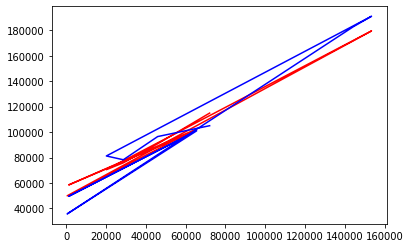

In [68]:
plt.plot(X_test['R&D Spend'],y_pred,'r')
plt.plot(X_test['R&D Spend'],y_test,'b')
plt.show()

**Scenario 1: HEART DISEASE PREDICTION USING
LOGISTIC REGRESSION**

Industry: Healthcare

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart
diseases. Half the deaths in the United States and other developed countries are due to cardio vascular
diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in
high risk patients and in turn reduce the complications. This research intends to pinpoint the most
relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

Tasks to be Performed
* Import the required libraries
* Prepare the data (Data Proprocessing)
* Check for missing value
* Explore the data using EDA
* Training a logistic regression model
* Evaluating the model

In [69]:
!wget -O framingham.csv https://www.dropbox.com/s/83lq09bnj62zc3t/framingham.csv?dl=0

--2021-04-28 21:00:00--  https://www.dropbox.com/s/83lq09bnj62zc3t/framingham.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/83lq09bnj62zc3t/framingham.csv [following]
--2021-04-28 21:00:00--  https://www.dropbox.com/s/raw/83lq09bnj62zc3t/framingham.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca868aa1b541537da679a13f8ff.dl.dropboxusercontent.com/cd/0/inline/BNfK-clqxQu8gSY8qCySwYJip-U0p0SgZoi7Uqe5Xg379iMkxE-g9hT0HOWIXmSO8ZzNV45noxq_842T3SYFV2Ijf0ecw2DtD-bIP17yb28wpeEN4NVklrBGfYSmyQiAp95NO_ve48_TyvuBxS2DtFbW/file# [following]
--2021-04-28 21:00:01--  https://uca868aa1b541537da679a13f8ff.dl.dropboxusercontent.com/cd/0/inline/BNfK-clqxQu8gSY8qCySwYJip-U0p0SgZoi7Uqe5Xg379iMkxE-g9hT0HOWIXmSO8ZzNV45noxq_

In [71]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*Step 2: Data Preprocessing*

In [72]:
heart_df = pd.read_csv("framingham.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Predict variable (desired target):
* 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [73]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

*Step 3: Finding missing values*

In [74]:
heart_df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [75]:
count=0
for i in heart_df.isnull().sum(axis=1):
  if i>0:
    count=count+1
print("Total number of rows with missing values is ",count)
print("since it is only",round((count/len(heart_df))*100),'Percentage ofthe entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  489
since it is only 12 Percentage ofthe entire dataset the rows with missing values are excluded.


In [76]:
heart_df.dropna(axis=0,inplace=True)

In [77]:
heart_df.isnull().sum()

Sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

*Step 4: Explore the data using EDA*

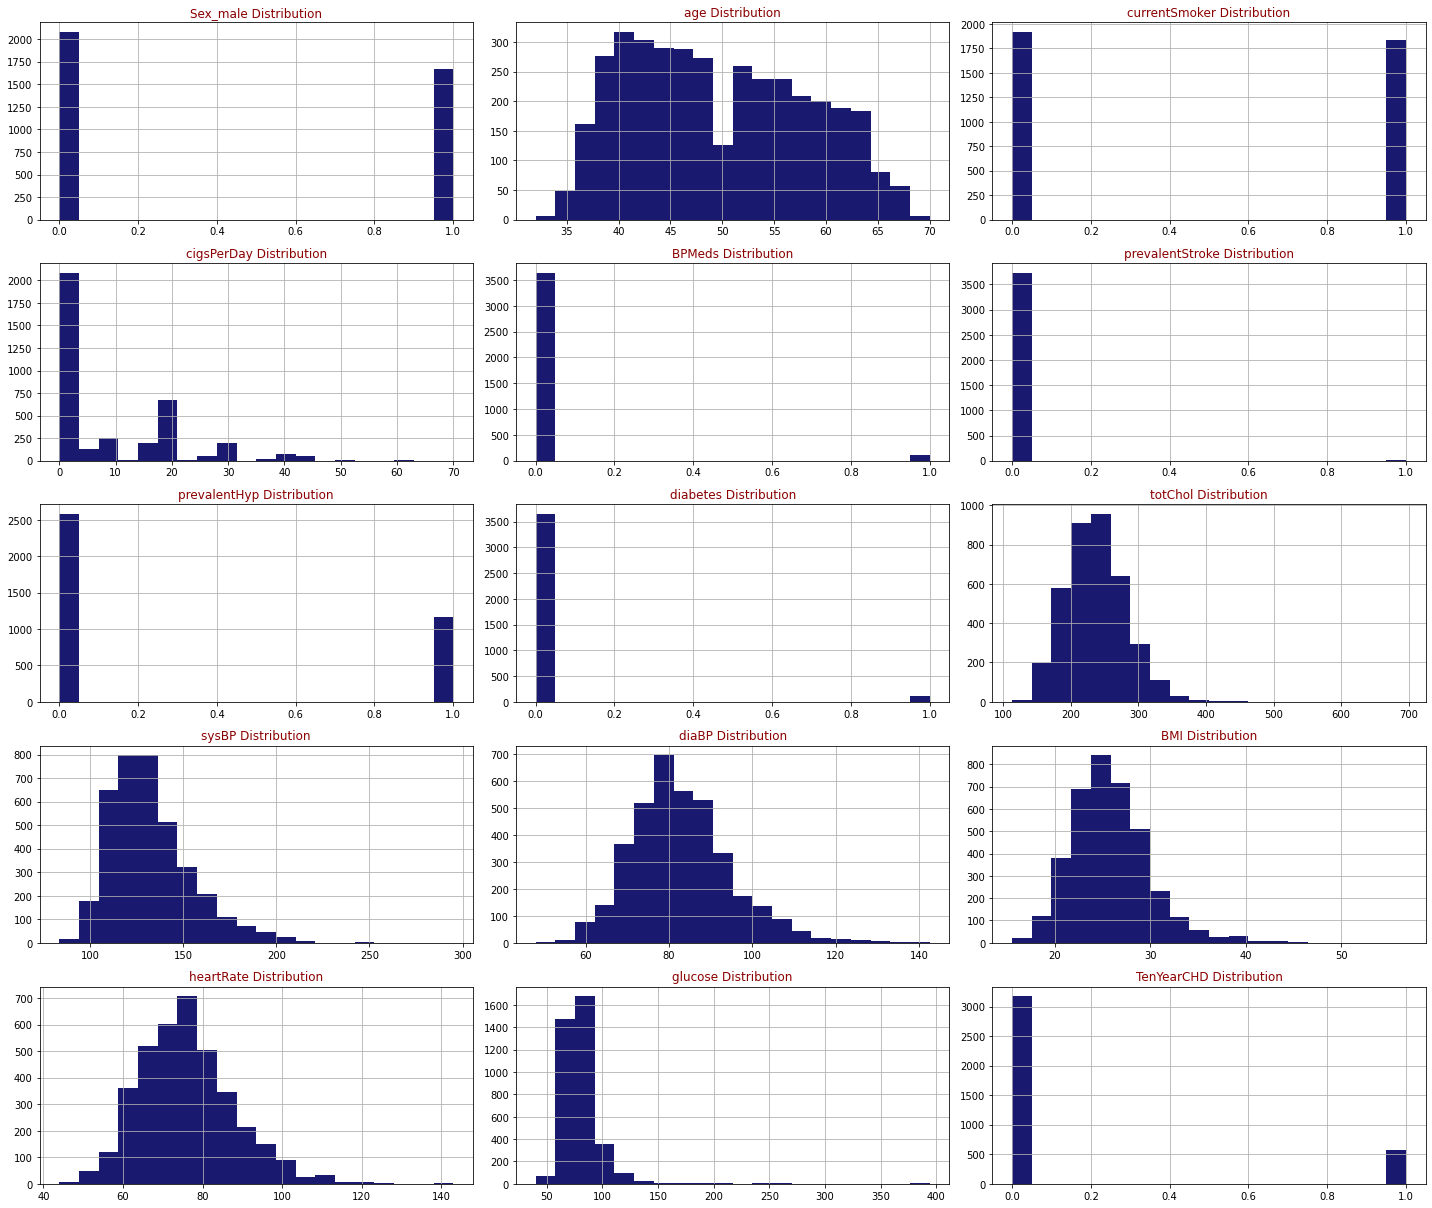

In [81]:
def draw_histograms(dataframe, features, rows, cols):
  fig=plt.figure(figsize=(20,20))
  for i, feature in enumerate(features):
    ax=fig.add_subplot(rows,cols,i+1)
    dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
    ax.set_title(feature+" Distribution",color='Darkred')

  fig.tight_layout()
  plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [82]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

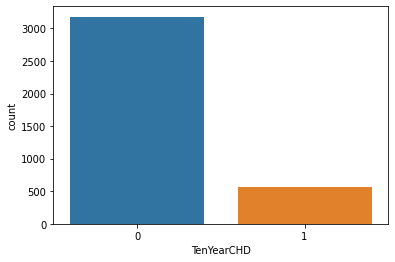

In [83]:
sns.countplot(x = 'TenYearCHD',data=heart_df)

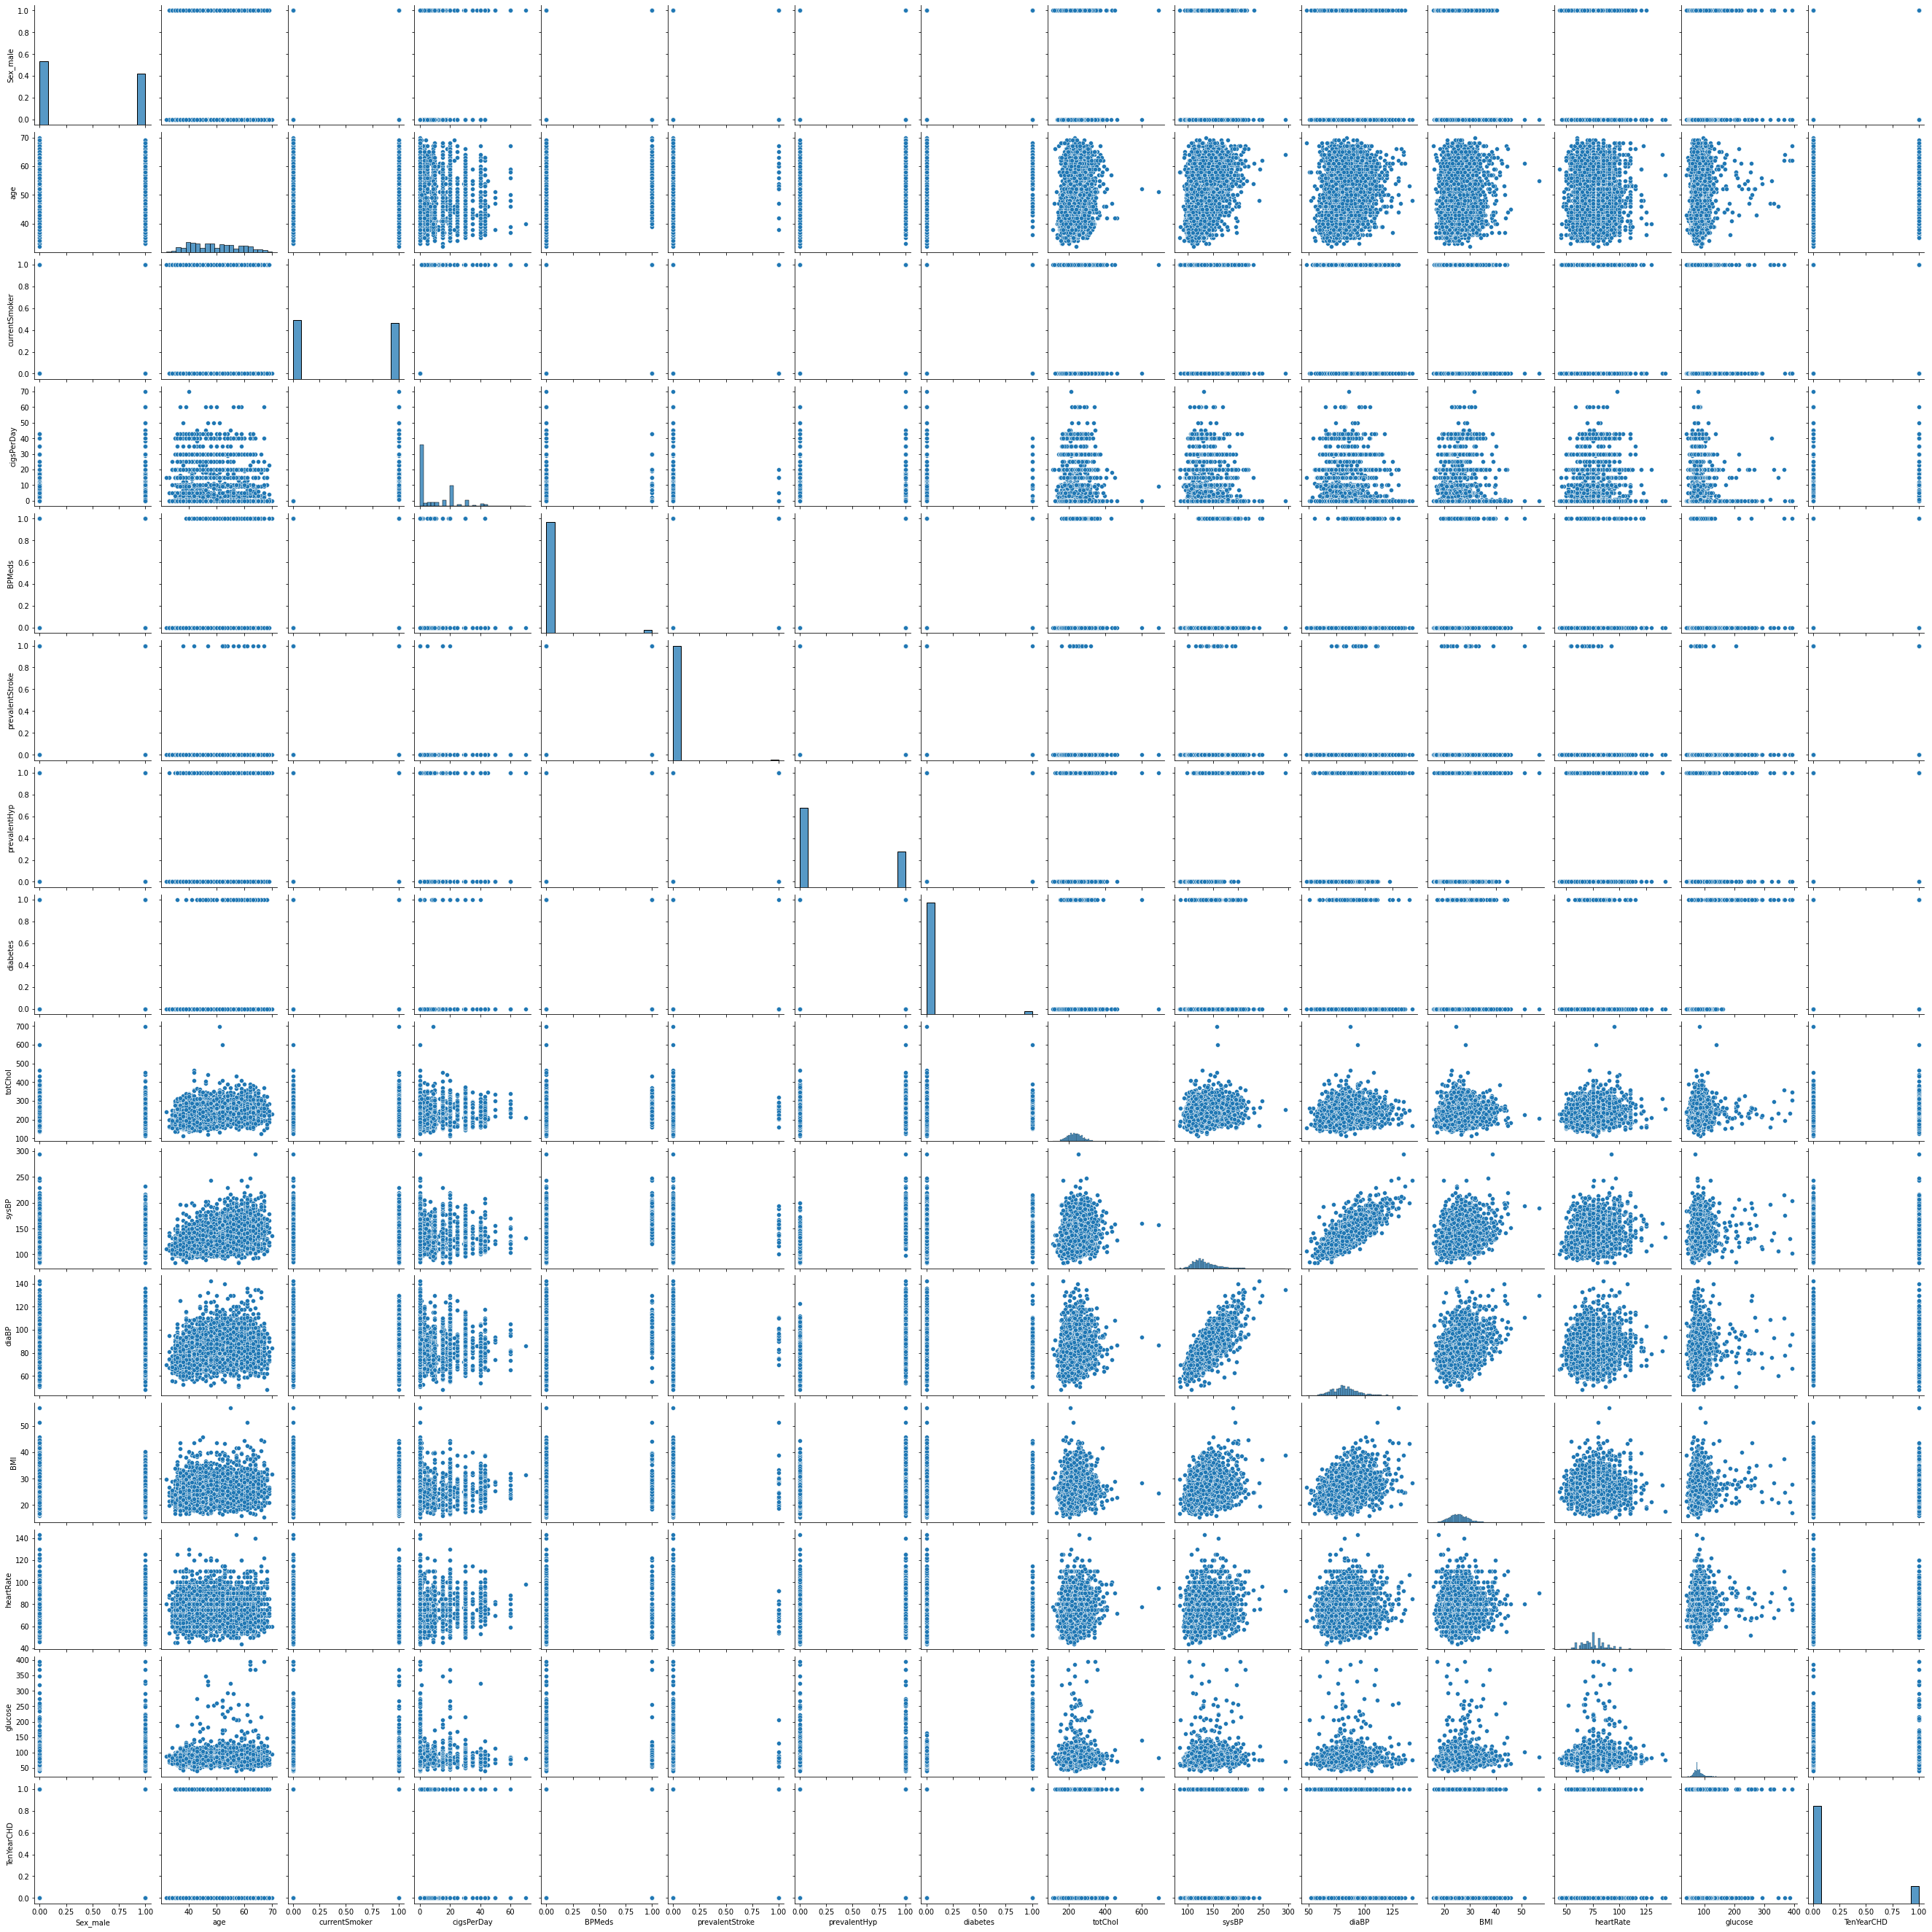

In [84]:
sns.pairplot(data=heart_df)

*Step 5: Building a Logistic Regression model*

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical
dependent variable from a set of predictor or independent variables. In logistic regression the dependent
variable is always binary. Logistic regression is mainly used to for prediction and also calculating the
probability of success.

In [85]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [87]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                  0.1170
Time:                        21:42:06   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
Sex_male            0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby
showing low statistically significant relationship with the probability of heart disease. Backward elemination
approach is used here to remove those attributes with highest Pvalue one at a time follwed by running the
regression repeatedly until all attributes have P Values less than 0.05.

*Feature Selection: Backward elemination (P-value approach)*

In [89]:
def back_feature_elem (data_frame,dep_var,col_list):
  """ Takes in the dataframe, the dependent variable and a list of column names, runs
the regression repeatedly eleminating feature with the highest
P-value above alpha one at a time and returns the regression summary with all p-val
ues below alpha"""
  while len(col_list)>0:
    model = sm.Logit(dep_var,data_frame[col_list])
    result=model.fit(disp=0)
    largest_pvalue=round(result.pvalues,3).nlargest(1)
    if largest_pvalue[0]<(0.05):
      return result
      break
    else:
      col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

In [90]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Wed, 28 Apr 2021   Pseudo R-squ.:                  0.1149
Time:                        21:51:29   Log-Likelihood:                -1417.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 2.127e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1264      0.468    -19.504      0.000     -10.043      -8.209
Sex_male       0.5815      0.105      5.524      0.000       0.375       0.788
age            0.0655      0.006     10.343      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.805      0.000       0.012       0.028
totChol        0.0023      0.001      2.106      0.035       0.000       0.004
sysBP          0.0174      0.002      8.162      0.000       0.013       0.022
glucose        0.0076      0.002      4.574      0.000       0.004       0.011
==============================================================================
"""

Logistic regression equation
         
         P = eβ0+β1X1 / 1 + eβ0+β1X1

When all features plugged in:

logit(p) = eβ0+β1X1 / 1 + eβ0+β1X1
logit(p) = log(p/(1 − p)) = β0 + β1 ∗ Sexmale + β2 ∗ age + β3 ∗ cigsPerDay + β4 ∗ glucose

*Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues*

In [91]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000043       0.000272    0.000109   0.000
Sex_male        1.455242       2.198536    1.788687   0.000
age             1.054483       1.080969    1.067644   0.000
cigsPerDay      1.011733       1.028128    1.019897   0.000
totChol         1.000158       1.004394    1.002273   0.035
sysBP           1.013292       1.021784    1.017529   0.000
glucose         1.004346       1.010898    1.007617   0.000


*Step 5: Training the mode*

Splitting into Train and Test

In [93]:
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

*Fit the data Training the model*

In [94]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


*Step 6: Model Evaluation*

Model Accuracy

In [95]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8748335552596538

Confusion Matrix

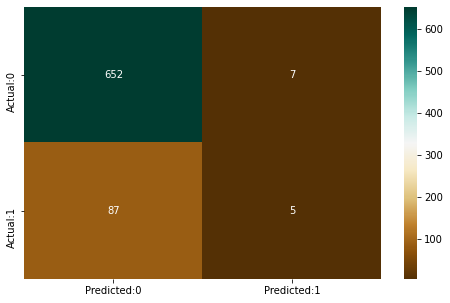

In [97]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="BrBG")

In [98]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)
print("True Negative", TN)
print("True Posetive", TP)
print("False Negative", FN)
print("False Posetive", FP)
print("Sensitivity", sensitivity)
print("Specificity", specificity)

True Negative 652
True Posetive 5
False Negative 87
False Posetive 7
Sensitivity 0.05434782608695652
Specificity 0.9893778452200304


In [102]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),' \n\n',
      'Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',
      'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',
      'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n\n',
      'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n\n',
      'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n\n',
      'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity ),'\n\n',
      'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8748335552596538  

 Missclassification = 1-Accuracy =  0.12516644474034622 

 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.05434782608695652 

 Specificity or True Negative Rate = TN/(TN+FP) =  0.9893778452200304 

 Positive Predictive value = TP/(TP+FP) =  0.4166666666666667 

 Negative predictive Value = TN/(TN+FN) =  0.8822733423545331 

 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  5.116459627329198 

 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9558048813016804


*Predicted probabilities of 0 (Coronary Heart Disease: No) and 1 ( Coronary
Heart Disease: Yes) for the test data with a default classification threshold of 0.5*

In [103]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)',
'Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.875308,0.124692
1,0.956491,0.043509
2,0.783654,0.216346
3,0.806745,0.193255
4,0.893132,0.106868


*Lower the threshhold*

Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative (
ignoring the probability of disease when there actualy is one) is more dangerous than a False Positive in this
case. Hence inorder to increase the sensitivity, threshold can be lowered

In [105]:
from sklearn.preprocessing import binarize
for i in range(1,5):
  cm2=0
  y_pred_prob_yes=logreg.predict_proba(x_test)
  y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
  cm2=confusion_matrix(y_test,y_pred2)
  print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
          'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
        'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/
(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[312 347]
 [ 12  80]] 
 with 392 correct predictions and 12 Type II errors( False Negatives) 

 Sensitivity:  0.8695652173913043 Specificity:  0.47344461305007585 



With 0.2 threshold the Confusion Matrix is  
 [[518 141]
 [ 43  49]] 
 with 567 correct predictions and 43 Type II errors( False Negatives) 

 Sensitivity:  0.532608695652174 Specificity:  0.7860394537177542 



With 0.3 threshold the Confusion Matrix is  
 [[600  59]
 [ 64  28]] 
 with 628 correct predictions and 64 Type II errors( False Negatives) 

 Sensitivity:  0.30434782608695654 Specificity:  0.9104704097116844 



With 0.4 threshold the Confusion Matrix is  
 [[640  19]
 [ 80  12]] 
 with 652 correct predictions and 80 Type II errors( False Negatives) 

 Sensitivity:  0.13043478260869565 Specificity:  0.9711684370257967 





*ROC Curve*

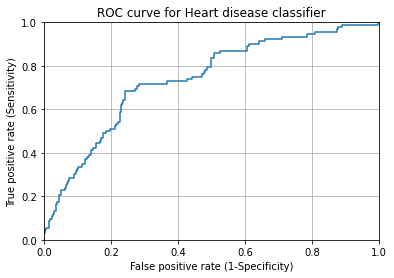

In [106]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

*Area under the curve (AUC)*

The area under the ROC curve quantifies model classification accuracy; the higher the area, the greater the
disparity between true and false positives, and the stronger the model in classifying members of the training
dataset. An area of 0.5 corresponds to a model that performs no better than random classification and a
good classifier stays as far away from that as possible. An area of 1 is ideal. The closer the AUC to 1 the
better.

In [107]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7386686019660883

Conclusion:
* All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting
significant role in the Heart disease prediction.
* Men seem to be more susceptible to heart disease than women.Increase in Age, number of cigarettes
smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.
* Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of
'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in
odds (0.2%)
* The model predicted with 0.87 accuracy. The model is more specific than sensitive.
* The Area under the ROC curve is 73.8 which is somewhat satisfactory.
* Overall model could be improved with more data.